In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pylab as pl
import urllib
import sklearn
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [19]:
input_data = pd.read_csv('Dataset_7.1.csv', header=0, delimiter=';')
data = input_data
# data = input_data.drop(['ppnnr'], axis='columns')
data['Group'].replace({1: 0, 2:0, 3:1}, inplace=True)
data = data.drop(['ppnnr'],axis='columns')
data = data.dropna()
data.head()

,Group,geslacht,leeftijd,BMI,SBP,DBP,Hypertensie,DM,Hyperchol,Statine,...,MDRD,LDL,HDL,Trigly,Symp_Inf_aanw,Old_Inf_aanw,WMH_PVD_ext,PVS_BG_ext,PVS_CS_ext,MB_totaal_aanw
0,0,1,78,27.968016,147.5,83.5,0,0,1,1,...,0,1.9,1.2,1.95,1.0,1.0,1.0,1.0,1.0,0.0
1,0,2,65,22.656250,133.5,84.0,1,0,1,1,...,0,3.5,2.0,1.31,0.0,0.0,1.0,0.0,1.0,0.0
2,0,2,55,31.202564,182.0,113.0,1,0,1,1,...,0,1.9,1.8,2.03,1.0,0.0,0.0,0.0,1.0,0.0
3,0,1,46,32.824138,152.5,93.5,1,0,1,1,...,0,2.2,0.9,3.58,1.0,0.0,0.0,0.0,1.0,0.0
4,0,1,63,25.689562,140.0,82.5,0,0,1,1,...,0,1.9,1.7,0.93,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
X = data.drop(['Group'],axis='columns')

y = data['Group']

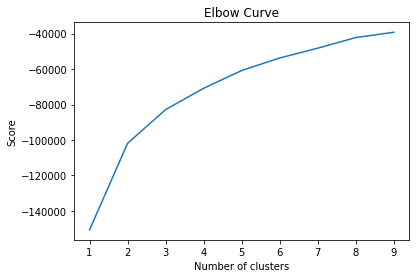

In [21]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [22]:
model = KMeans(n_clusters = 2)
model.fit(X)

KMeans(n_clusters=2)

In [23]:
accuracy_score(y,model.labels_)

0.5862068965517241

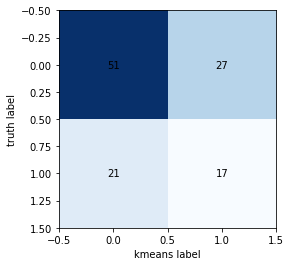

In [24]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, model.labels_)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
dbscan = DBSCAN(eps=6.9, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

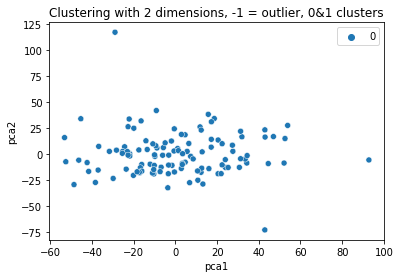

In [11]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
from sklearn.decomposition import PCA
import seaborn as sns
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=clusters, data=results)
plt.title('Clustering with 2 dimensions, -1 = outlier, 0&1 clusters')
plt.show()